In [39]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [40]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

In [41]:
data_dir = '/content/drive/MyDrive/PlantDisease/Data'
categories = os.listdir(data_dir)

images = []
labels = []

for category in categories:
    print(category)
    folder_path = os.path.join(data_dir, category)
    for img_file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_file)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (64, 64))
            images.append(img)
            labels.append(category)

# Convert images and labels to numpy array
images=np.array(images)

Tomato___Late_blight
Tomato___Tomato_Yellow_Leaf_Curl_Virus
Tomato___Tomato_mosaic_virus
Tomato___Target_Spot
Tomato___healthy
Tomato___Early_blight
Tomato___Bacterial_spot


In [42]:
#convert to numpy arrays
x=np.array(images)
y=np.array(labels)


print("labels:",np.unique(y))
print("Data Shape:",x.shape)

labels: ['Tomato___Bacterial_spot' 'Tomato___Early_blight' 'Tomato___Late_blight'
 'Tomato___Target_Spot' 'Tomato___Tomato_Yellow_Leaf_Curl_Virus'
 'Tomato___Tomato_mosaic_virus' 'Tomato___healthy']
Data Shape: (11721, 64, 64, 3)


class Distribution
Tomato___Tomato_Yellow_Leaf_Curl_Virus    1961
Tomato___healthy                          1926
Tomato___Early_blight                     1920
Tomato___Late_blight                      1851
Tomato___Target_Spot                      1827
Tomato___Tomato_mosaic_virus              1810
Tomato___Bacterial_spot                    426
Name: count, dtype: int64


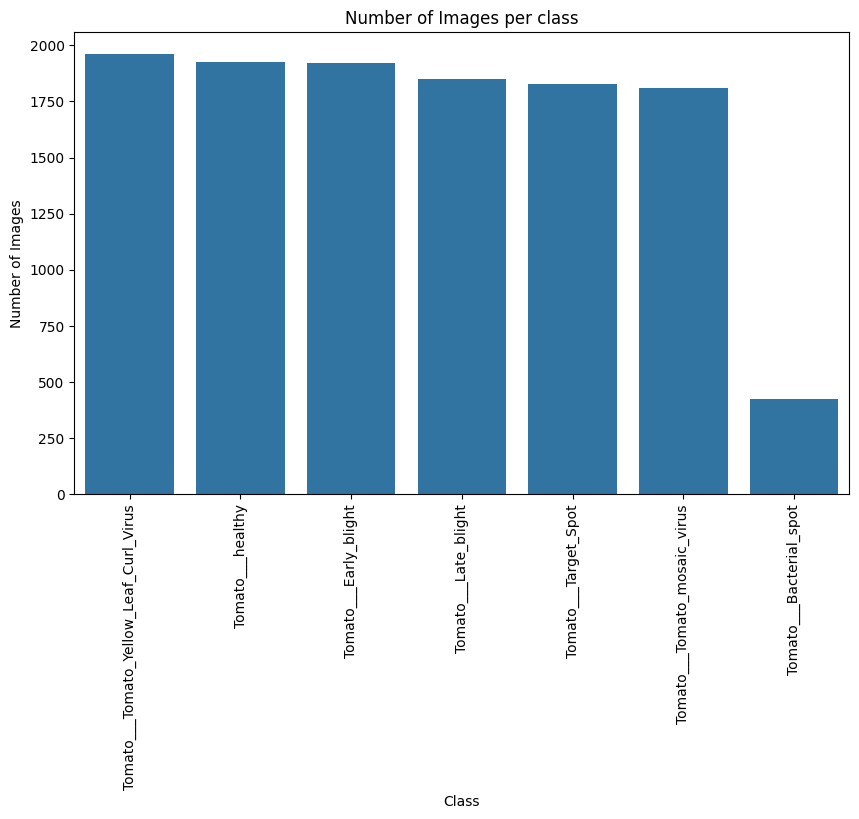

In [43]:
class_count=pd.Series(y).value_counts()
print("class Distribution")
print(class_count)


#plot class distribution
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.barplot(x=class_count.index,y=class_count.values)
plt.xticks(rotation=90)

plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Number of Images per class')
plt.show()

In [44]:
#remove corrupted images
valid_images=[]
valid_labels=[]


for img,label in zip(x,y):
  if img.shape==(64,64,3):
    valid_images.append(img)
    valid_labels.append(label)

x=np.array(valid_images)
y=np.array(valid_labels)

print("Cleaned Data Shape:",x.shape)



Cleaned Data Shape: (11721, 64, 64, 3)


In [45]:
#Encode labels
le=LabelEncoder()
y_encoded=le.fit_transform(y)

#save class names for later use
class_names=le.classes_
class_names

array(['Tomato___Bacterial_spot', 'Tomato___Early_blight',
       'Tomato___Late_blight', 'Tomato___Target_Spot',
       'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
       'Tomato___Tomato_mosaic_virus', 'Tomato___healthy'], dtype='<U38')

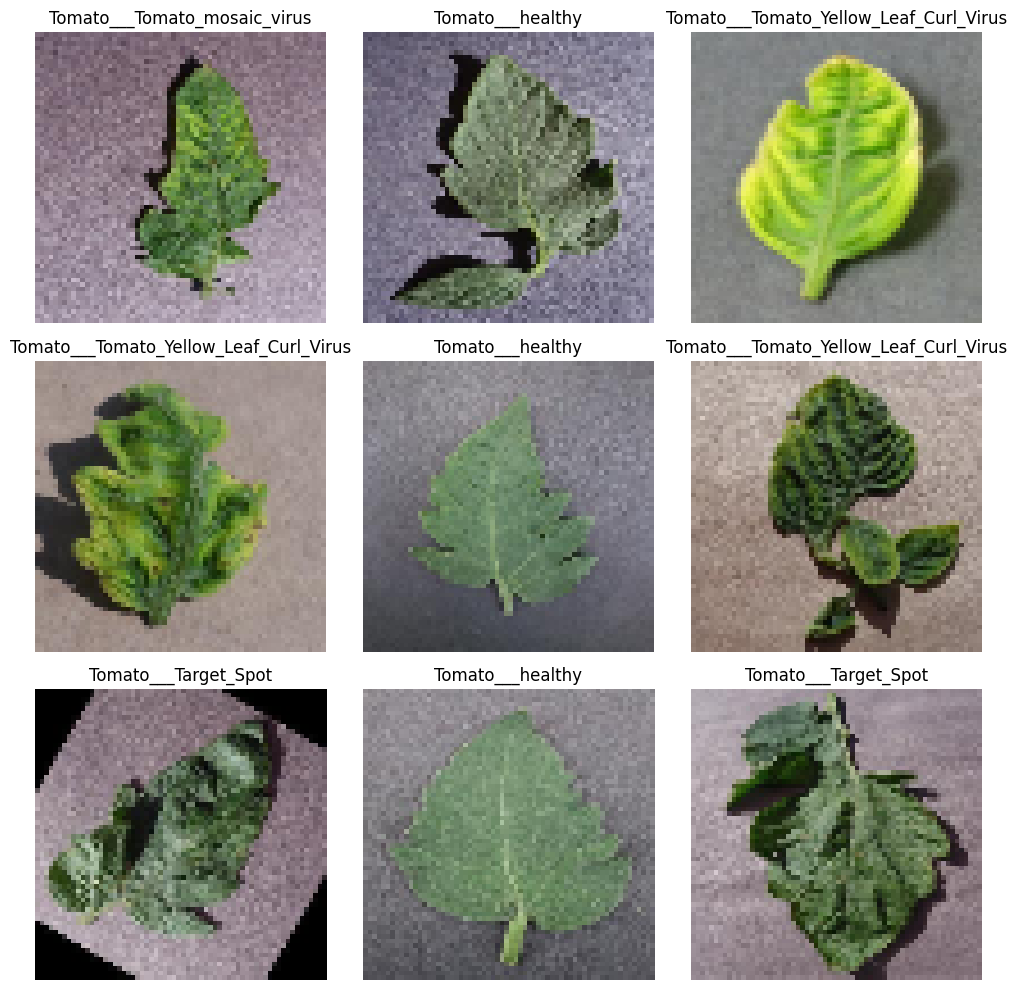

In [46]:
import random

plt.figure(figsize=(10, 10))
for i in range(9):
    idx = random.randint(0, len(x))
    plt.subplot(3, 3, i + 1)
    plt.imshow(cv2.cvtColor(x[idx], cv2.COLOR_BGR2RGB))
    plt.title(class_names[y_encoded[idx]])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [47]:
def extract_color_histogram(image, bins=(8, 8, 8)):

    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([image], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])
    hist = cv2.normalize(hist, hist).flatten()
    return hist

hist_features = [extract_color_histogram(img) for img in x]
x_features = np.array(hist_features)

In [48]:
x_features.shape

(11721, 512)

In [49]:
#Choose model
model=SVC(kernel='rbf',C=10,gamma='scale')

In [50]:
#Train/Test split
x_train,x_test,y_train,y_test=train_test_split(x_features,y_encoded,test_size=0.2,random_state=42)


#train model
model.fit(x_train,y_train)

#predict
y_pred=model.predict(x_test)

Accuracy: 0.9722814498933902
F1 Score: 0.9720859349956827


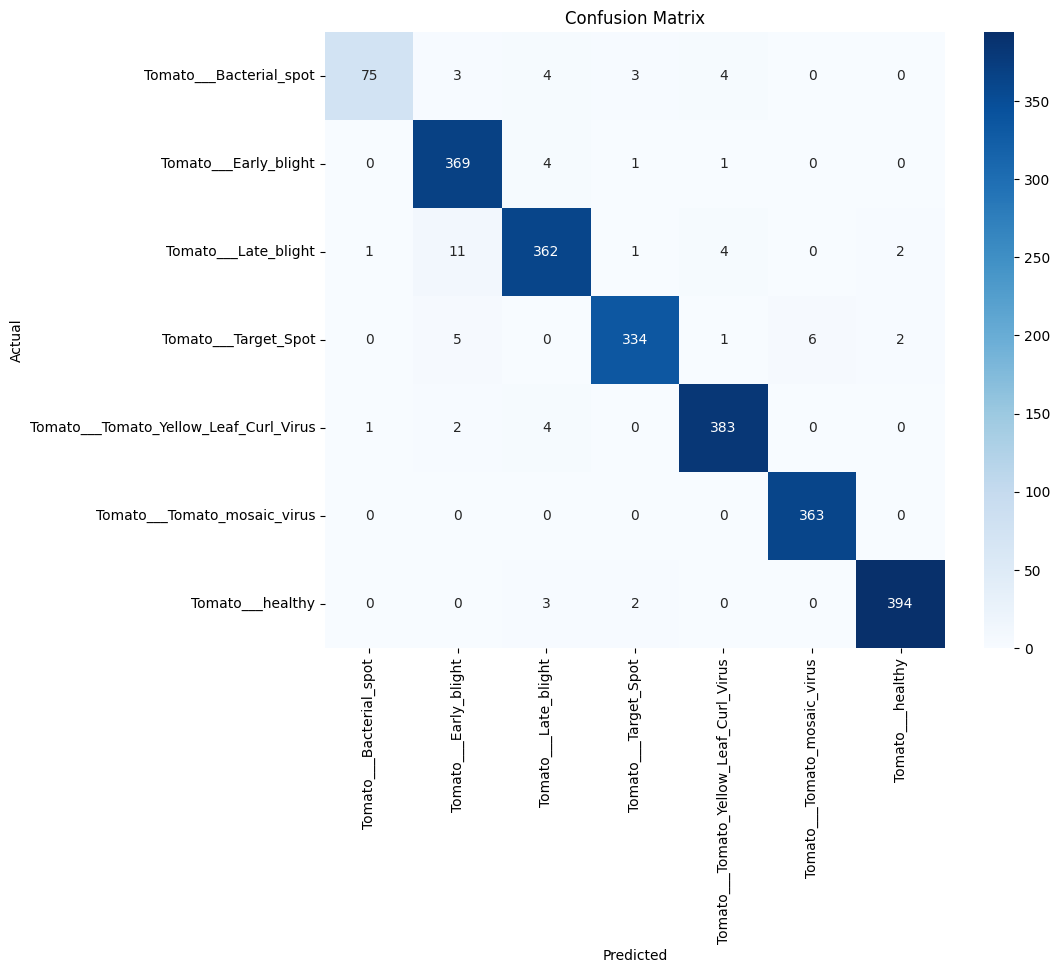

In [51]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report

#Accuracy
acc=accuracy_score(y_test,y_pred)
print("Accuracy:",acc)

#F1 Score
f1=f1_score(y_test,y_pred,average='weighted')
print("F1 Score:",f1)

#confusion Matrix
cm=confusion_matrix(y_test,y_pred)

#plot confusion Matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=class_names,yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [52]:
#classification Report
print("Classification Report")
print(classification_report(y_test,y_pred,target_names=class_names))

Classification Report
                                        precision    recall  f1-score   support

               Tomato___Bacterial_spot       0.97      0.84      0.90        89
                 Tomato___Early_blight       0.95      0.98      0.96       375
                  Tomato___Late_blight       0.96      0.95      0.96       381
                  Tomato___Target_Spot       0.98      0.96      0.97       348
Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.97      0.98      0.98       390
          Tomato___Tomato_mosaic_virus       0.98      1.00      0.99       363
                      Tomato___healthy       0.99      0.99      0.99       399

                              accuracy                           0.97      2345
                             macro avg       0.97      0.96      0.96      2345
                          weighted avg       0.97      0.97      0.97      2345

